In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in csv file
df = pd.read_csv('responces3 .csv')
#Show both the head and tail of the dataset
pd.set_option('display.max_rows', 10)
df

,Timestamp,Do you currently live in the United kingdom?,Are you familiar with the general concept of Artificial Intelligence (AI)?,How would you assess your understanding of Artificial Intelligence (AI) and its applications?,To what degree are you familiar with the role of AI in migration management in the United Kingdom?,Are you aware of any potential positive consequences associated with the use of AI in migration management?,Are you aware of any potential negative consequences associated with the use of AI in migration management?,"If you are aware of any potential negative consequences associated with the use of AI in migration management, please provide specific examples or details.","In your opinion, how transparent is the information available to the public regarding the implementation of AI in migration management in the United Kingdom?",How likely are you to seek information about AI in migration management independently?,What is your overall opinion on the use of Deception Detecting AI to analyse asylum seekers' statements for potential deception?,How do you think Deception Detecting AI could improve or impact the asylum application process?,"What concerns do you have, if any, about the implementation of Deception Detecting AI in the asylum application process?",What is your age?,What is your gender?,What is your ethnicity?,Are you or have you ever been a refugee or migrant to the UK?,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,2023/12/14 1:09:07 pm CET,Yes,Yes,Moderate,Moderately familiar,Yes,Yes,NaN,Not transparent at all,Likely,NaN,NaN,NaN,18-24,Female,"Black, Black British, Caribbean or African",No,You have added a random option 3 to one of the...,4.0,NaN
1,2023/12/14 1:13:07 pm CET,Yes,Yes,Limited,Not familiar at all,No,No,NaN,Not transparent at all,Neutral,NaN,NaN,NaN,25-34,Female,"Black, Black British, Caribbean or African",No,I think it’s best to use layman language becau...,2.0,NaN
2,2023/12/14 1:13:28 pm CET,Yes,Yes,Limited,Not familiar at all,No,Yes,NaN,Not transparent at all,Unlikely,NaN,NaN,NaN,18-24,Female,"Black, Black British, Caribbean or African",No,No feedback.,5.0,NaN
3,2023/12/14 1:16:17 pm CET,Yes,Yes,Limited,Not familiar at all,No,Yes,NaN,Not transparent at all,Unlikely,NaN,NaN,NaN,18-24,Female,"Black, Black British, Caribbean or African",No,Survey was clear. I was not confused by the qu...,5.0,NaN
4,2023/12/14 5:57:43 pm CET,Yes,Yes,Moderate,Not familiar at all,No,No,NaN,Not transparent at all,Very unlikely,NaN,NaN,NaN,35-44,Female,"Black, Black British, Caribbean or African",Yes,None,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2024/07/09 8:08:42 pm CET,Yes,Yes,Moderate,Slightly familar,Yes,Yes,One example is the risk of bias in AI algorith...,Moderately transparent,Likely,Neutral,Deception Detecting AI could significantly enh...,No concerns,18-24,Female,"Black, Black British, Caribbean or African",No,NaN,NaN,NaN
39,2024/07/09 8:23:44 pm CET,Yes,Yes,Moderate,Moderately familiar,Yes,No,Unaware,Moderately transparent,Very likely,Positive,Lacks the Human element,Ethical concerns;Privacy concerns,18-24,Male,"Black, Black British, Caribbean or African",No,NaN,NaN,NaN
40,2024/07/09 8:24:02 pm CET,Yes,Yes,Moderate,Slightly familar,Yes,Yes,Stereotyping passengers due to race or gender,Not transparent at all,Unlikely,Negative,Streamline/make the process faster,Ethical concerns;Privacy concerns;Accuracy con...,18-24,Female,"Black, Black British, Caribbean or African",No,NaN,NaN,NaN
41,2024/07/10 6:31:40 pm CET,Yes,Yes,Moderate,Not familiar at all,No,No,NaN,Moderately transparent,Neutral,Positive,less biases than real life assessors.,Privacy concerns;Security concerns,18-24,Female,White,No,NaN,NaN,NaN


In [22]:
#Rename columns
column_name={'Do you currently live in the United kingdom? ': 'uk',
             'Are you familiar with the general concept of Artificial Intelligence (AI)?': 'general familiarity',
             'How would you assess your understanding of Artificial Intelligence (AI) and its applications?': 'general understanding',
             'To what degree are you familiar with the role of AI in migration management in the United Kingdom?': 'migration familiarity',
             'Are you aware of any potential positive consequences associated with the use of AI in migration management?':'positive',
             'Are you aware of any potential negative consequences associated with the use of AI in migration management?':'negative',
             'If you are aware of any potential negative consequences associated with the use of AI in migration management, please provide specific examples or details.  ': 'text answer',
             'In your opinion, how transparent is the information available to the public regarding the implementation of AI in migration management in the United Kingdom?': 'transparent',
             'How likely are you to seek information about AI in migration management independently?': 'seek information',
             'What is your overall opinion on the use of Deception Detecting AI to analyse asylum seekers\' statements for potential deception?  ':'scenario opinion',
             'How do you think Deception Detecting AI could improve or impact the asylum application process?  ':'scenario impact',
             'What concerns do you have, if any, about the implementation of Deception Detecting AI in the asylum application process?  ':'scenario concerns',
             'What is your age?': 'age',
             'What is your gender?': 'gender',
             'What is your ethnicity? ': 'ethnicity',
             'Are you or have you ever been a refugee or migrant to the UK? ': 'migrant'
                } 
df.rename(columns=column_name, inplace=True)


#Display questions only used in the final survey not the pilot survey
survey_df= df.iloc[:, 0:17]

#Drop column index 0
survey_df= survey_df.drop(survey_df.columns[0], axis=1)

survey_df

,uk,general familiarity,general understanding,migration familiarity,positive,negative,text answer,transparent,seek information,scenario opinion,scenario impact,scenario concerns,age,gender,ethnicity,migrant
0,Yes,Yes,Moderate,Moderately familiar,Yes,Yes,NaN,Not transparent at all,Likely,NaN,NaN,NaN,18-24,Female,"Black, Black British, Caribbean or African",No
1,Yes,Yes,Limited,Not familiar at all,No,No,NaN,Not transparent at all,Neutral,NaN,NaN,NaN,25-34,Female,"Black, Black British, Caribbean or African",No
2,Yes,Yes,Limited,Not familiar at all,No,Yes,NaN,Not transparent at all,Unlikely,NaN,NaN,NaN,18-24,Female,"Black, Black British, Caribbean or African",No
3,Yes,Yes,Limited,Not familiar at all,No,Yes,NaN,Not transparent at all,Unlikely,NaN,NaN,NaN,18-24,Female,"Black, Black British, Caribbean or African",No
4,Yes,Yes,Moderate,Not familiar at all,No,No,NaN,Not transparent at all,Very unlikely,NaN,NaN,NaN,35-44,Female,"Black, Black British, Caribbean or African",Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,Yes,Yes,Moderate,Slightly familar,Yes,Yes,One example is the risk of bias in AI algorith...,Moderately transparent,Likely,Neutral,Deception Detecting AI could significantly enh...,No concerns,18-24,Female,"Black, Black British, Caribbean or African",No
39,Yes,Yes,Moderate,Moderately familiar,Yes,No,Unaware,Moderately transparent,Very likely,Positive,Lacks the Human element,Ethical concerns;Privacy concerns,18-24,Male,"Black, Black British, Caribbean or African",No
40,Yes,Yes,Moderate,Slightly familar,Yes,Yes,Stereotyping passengers due to race or gender,Not transparent at all,Unlikely,Negative,Streamline/make the process faster,Ethical concerns;Privacy concerns;Accuracy con...,18-24,Female,"Black, Black British, Caribbean or African",No
41,Yes,Yes,Moderate,Not familiar at all,No,No,NaN,Moderately transparent,Neutral,Positive,less biases than real life assessors.,Privacy concerns;Security concerns,18-24,Female,White,No


# Visualising the demographic characteristics of the survey respondents.


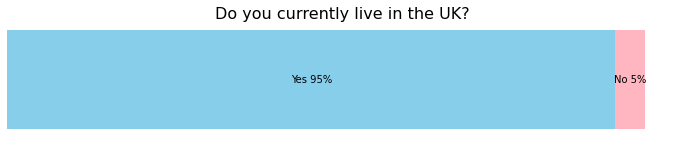

In [23]:
#Visualising the question 'Do you currently live in the UK?' with a stacked bar

#Calculate the percentage of Yes and No answers
uk_counts = survey_df['uk'].value_counts()
percentage = uk_counts / uk_counts.sum() * 100

#Plot the stacked bar for all categories manually
plt.figure(figsize=(12, 2))
plt.barh('uk', percentage['Yes'], color='skyblue', label='Yes')
plt.barh('uk', percentage['No'], left=percentage['Yes'], color='lightpink', label='No')

#Add labels to bars and remove axis labels 
plt.text(percentage['Yes'] / 2, 0, f"Yes {percentage['Yes']:.0f}%", ha='center', va='center')
plt.text(percentage['Yes'] + percentage['No'] / 2, 0, f"No {percentage['No']:.0f}%", ha='center', va='center')
plt.title('Do you currently live in the UK?', fontsize='16')
plt.xticks([])
plt.yticks([])

#Remove the box around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

#Display
plt.show()


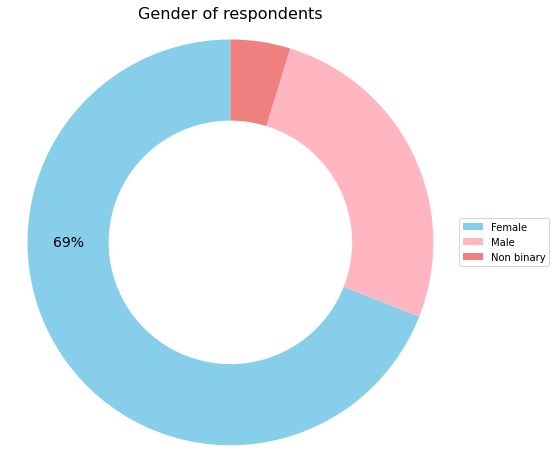

In [24]:
#Count the occurance of each gender group and remove error
filtered_df = survey_df[survey_df['gender'] != 'SurveySwap test']
gender_counts = filtered_df['gender'].value_counts()

#Calculate the total count of all age groups
total_count = gender_counts.sum()

#Plot
custom_colours = ['skyblue',  'lightpink','lightcoral', 'lightgreen', 'orange']
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=None, startangle=90, wedgeprops=dict(width=0.4), colors=custom_colours, pctdistance=0.75)
plt.legend(labels=gender_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.title('Gender of respondents',fontsize=16)

#Displaying the percentage of the Female group on the pie chart
percentage_female = (gender_counts['Female'] / total_count) * 100
plt.text(-0.8, 0, f'{percentage_female:.0f}%', ha='center', va='center', fontsize=14)

#Display
plt.show()

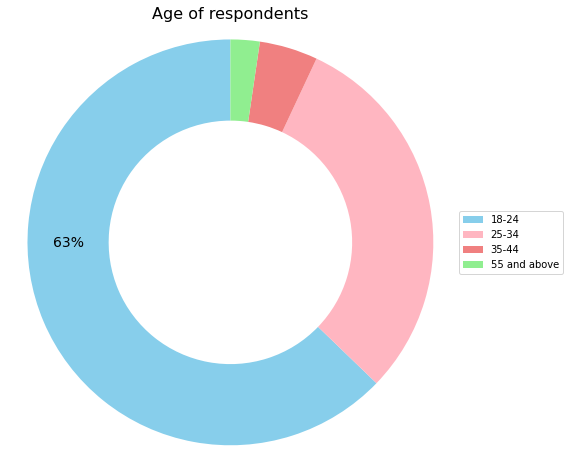

In [25]:
#Visualising age with a piechart

#Count the occurance of each age group
age_counts = survey_df['age'].value_counts()

#Calculate the total count of all age groups
total_count = age_counts.sum()

#Plot
custom_colours = ['skyblue',  'lightpink','lightcoral', 'lightgreen', 'orange']
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=None, startangle=90, wedgeprops=dict(width=0.4), colors=custom_colours, pctdistance=0.75)
plt.legend(labels=age_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.title('Age of respondents',fontsize=16)

#Displaying the percentage of the "18-24" age group on the pie chart
percentage_18_24 = (age_counts['18-24'] / total_count) * 100
plt.text(-0.8, 0, f'{percentage_18_24:.0f}%', ha='center', va='center', fontsize=14)

#Display
plt.show()




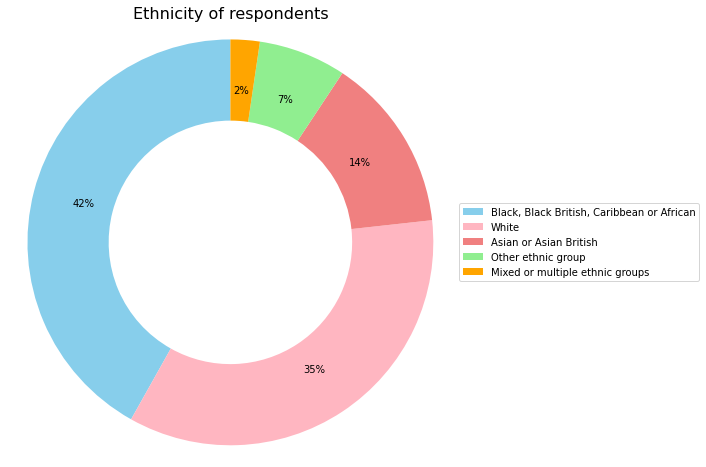

In [26]:
#Visualising ethnicity with a piechart

#Count the occurance of each ethnicity
ethnicity_counts = survey_df['ethnicity'].value_counts()

#Plot
custom_colours = ['skyblue',  'lightpink','lightcoral', 'lightgreen', 'orange']
plt.figure(figsize=(8, 8))
plt.pie(ethnicity_counts, labels=None,autopct='%1.0f%%', startangle=90, wedgeprops=dict(width=0.4), colors=custom_colours, pctdistance=0.75)
plt.legend(labels=ethnicity_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.title('Ethnicity of respondents', fontsize=16)
#Display
plt.show()

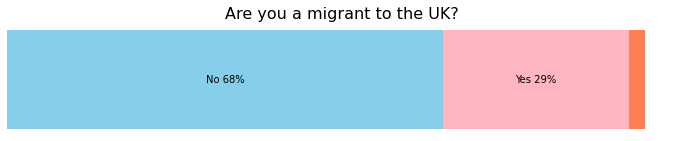

In [27]:
#Visualising migration status with a stacked bar

#Use responces of respondants who live in the UK
uk_yes = survey_df[survey_df['uk'] == 'Yes']

#Calculate the percentage of Yes , No and Prefer not to say answers
migrant_counts = uk_yes['migrant'].value_counts()
percentage = migrant_counts / migrant_counts.sum() * 100

#Plot the stacked bar for all categories manually
plt.figure(figsize=(12, 2))
plt.barh('Migrant', percentage['No'], color='skyblue', label='No')
plt.barh('Migrant', percentage['Yes'], left=percentage['No'], color='lightpink', label='Yes')
plt.barh('Migrant', percentage['Prefer to to say'], left=percentage['Yes']+percentage['No'], color='coral', label='Prefer not to say')

#Add labels to bars and remove axis labels 
plt.text(percentage['No'] / 2, 0, f"No {percentage['No']:.0f}%", ha='center', va='center')
plt.text(percentage['No'] + percentage['Yes'] / 2, 0, f"Yes {percentage['Yes']:.0f}%", ha='center', va='center')
#Prefer not to say is too messy to label
#plt.text(percentage['No'] + percentage['Yes'] + percentage['Prefer to to say'] / 2, 0, f"{percentage['Prefer to to say']:.0f}%", ha='center', va='center')
plt.title('Are you a migrant to the UK?', fontsize='16')
plt.xticks([])
plt.yticks([])

#Remove the box around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

#Display
plt.show()


# Visualising the survey questions for all respondants


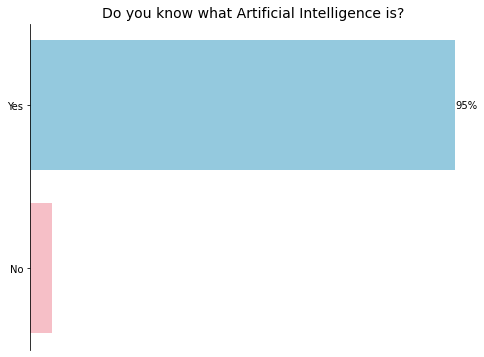

In [28]:
#Visuliasing the question 'Are you familiar with the general concept of Artificial Intelligence (AI)?' with a horizontal bar chart 

#Use responces of respondants who live in the UK
uk_yes = survey_df[survey_df['uk'] == 'Yes']

#Calculate the percentage of Yes and No answers
familiarity_counts= uk_yes['general familiarity'].value_counts()
percentage = familiarity_counts/ familiarity_counts.sum() *100
plt.figure(figsize=(8, 6))

#Plotting the bar chart using seaborn
ax= sns.barplot(x=percentage.values, y=percentage.index, palette= ['skyblue', 'lightpink'])

# Add percentage label next to the 'Yes' bar
plt.text(percentage['Yes'], 0, f'{int(percentage["Yes"])}%', ha='left', va='center', fontsize=10)

#Add labels and remove x axis and spines
plt.title("Do you know what Artificial Intelligence is?", fontsize='14')
sns.despine()
plt.xticks([])
ax.spines['bottom'].set_visible(False)

#Display
plt.show()

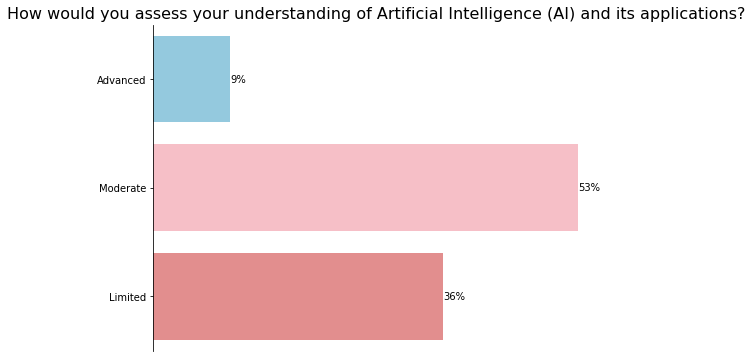

In [29]:
#Visuliasing the question 'Are you familiar with the general concept of Artificial Intelligence (AI)?' with a horizontal bar chart 

#Use responces of respondants who live in the UK
uk_yes = survey_df[survey_df['uk'] == 'Yes']

#Calculate the percentage for each answer
understanding_counts= uk_yes['general understanding'].value_counts()
percentage = understanding_counts/ understanding_counts.sum() *100
plt.figure(figsize=(8, 6))

#Plotting the bar chart using seaborn
ax= sns.barplot(x=percentage.values, y=percentage.index, order=['Advanced', 'Moderate', 'Limited'], palette= ['skyblue', 'lightpink','lightcoral'])

# Add percentage label next to each bar
plt.text(percentage['Advanced'], 0, f'{int(percentage["Advanced"])}%', ha='left', va='center', fontsize=10)
plt.text(percentage['Moderate'], 1, f'{int(percentage["Moderate"])}%', ha='left', va='center', fontsize=10)
plt.text(percentage['Limited'], 2, f'{int(percentage["Limited"])}%', ha='left', va='center', fontsize=10)

#Add labels and remove x axis and spines
plt.title("How would you assess your understanding of Artificial Intelligence (AI) and its applications?", fontsize='16')
sns.despine()
plt.xticks([])
ax.spines['bottom'].set_visible(False)
    
#Display
plt.show()

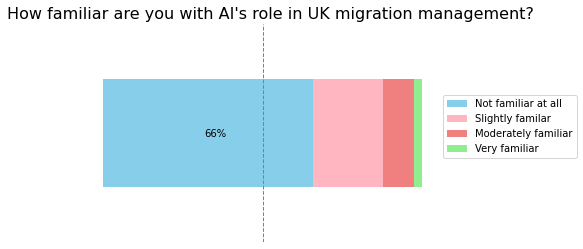

In [30]:
#Visulalising the surevy question 'To what degree are you familiar with the role of AI in migration management in the United Kingdom?' with a stacked bar chart

#Calculate the percentage of responses for each familiarity level
ai_counts = uk_yes['migration familiarity'].value_counts()
percentage = ai_counts / ai_counts.sum() * 100

# Plot the stacked bar, add 50% line
ax = percentage.to_frame().T.plot.barh(stacked=True, color=custom_colours)
ax.set_title('How familiar are you with AI\'s role in UK migration management?', fontsize=16)
ax.axvline(50, color='grey', linestyle='dashed', linewidth=1)
ax.legend(bbox_to_anchor=(1.0, 0.7))

#Remove axis's and spines 
sns.despine()
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks([])
plt.xticks([])

#Add labels and the percentage for 'Not familiar at all'
percentage_not = (ai_counts['Not familiar at all'] / ai_counts.sum()) * 100
plt.text(35, 0, f'{percentage_not:.0f}%', ha='center', va='center', fontsize=10)

#Display
plt.show()



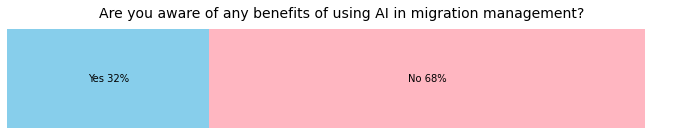

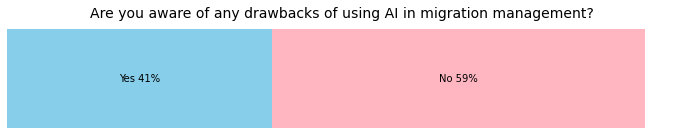

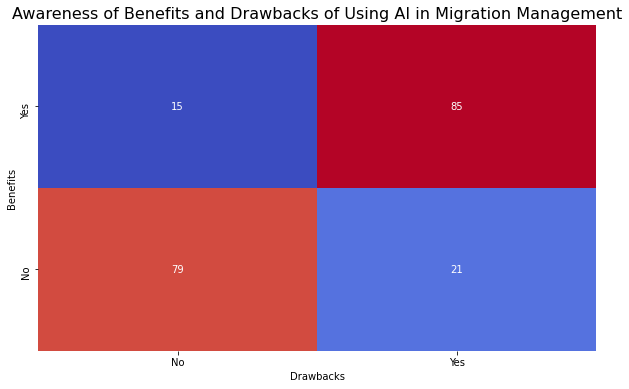

In [31]:
#Visulising the questions 'Are you aware of any potential positive/negative consequences associated with the use of AI in migration management?' with a stacked bar

#Use responces of respondants who live in the UK
uk_yes = survey_df[survey_df['uk'] == 'Yes']

#Calculate the percentage of Yes and No answers
positive_counts = uk_yes['positive'].value_counts()
percentage = positive_counts / positive_counts.sum() * 100

#Plot the stacked bar for all categories manually
plt.figure(figsize=(12, 2))
plt.barh('Positive', percentage['Yes'], color='skyblue', label='Yes')
plt.barh('Positive', percentage['No'], left=percentage['Yes'], color='lightpink', label='No')

#Add labels to bars and remove axis labels 
plt.text(percentage['Yes'] / 2, 0, f"Yes {percentage['Yes']:.0f}%", ha='center', va='center')
plt.text(percentage['Yes'] + percentage['No'] / 2, 0, f"No {percentage['No']:.0f}%", ha='center', va='center')
plt.title('Are you aware of any benefits of using AI in migration management?', fontsize='14')
plt.xticks([])
plt.yticks([])

#Remove the box around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

#Display
plt.show()


#Calculate the percentage of Yes and No answers
negative_counts = uk_yes['negative'].value_counts()
percentage = negative_counts / negative_counts.sum() * 100

#Plot the stacked bar for all categories manually
plt.figure(figsize=(12, 2))
plt.barh('Negative', percentage['Yes'], color='skyblue', label='Yes')
plt.barh('Negative', percentage['No'], left=percentage['Yes'], color='lightpink', label='No')

#Add labels to bars and remove axis labels 
plt.text(percentage['Yes'] / 2, 0, f"Yes {percentage['Yes']:.0f}%", ha='center', va='center')
plt.text(percentage['Yes'] + percentage['No'] / 2, 0, f"No {percentage['No']:.0f}%", ha='center', va='center')
plt.title('Are you aware of any drawbacks of using AI in migration management?', fontsize='14')
plt.xticks([])
plt.yticks([])

#Remove the box around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

#Display
plt.show()

#Heatmap plotting the two above questions against each other
#Generate normalised cross-tabulation for positive and negative consequences
table = pd.crosstab(uk_yes['positive'], uk_yes['negative'], normalize='index') * 100

#Sort by 'Yes' responses for positive consequences
table = table.sort_values(by='Yes', ascending=False)

#Plot heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(table, annot=True, cmap='coolwarm', cbar=False, fmt='.0f')
ax.set_title('Awareness of Benefits and Drawbacks of Using AI in Migration Management', fontsize=16)
ax.set_xlabel('Drawbacks')
ax.set_ylabel('Benefits')
plt.show()



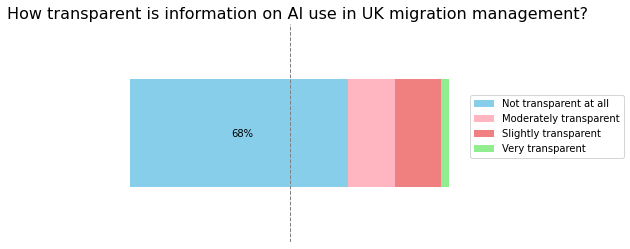

In [32]:
#Visulisaing the question 'In your opinion, how transparent is the information available to the public regarding the implementation of AI in migration management in the United Kingdom?'
#Calculate the percentage of responses for each transparency level
transparent_counts = uk_yes['transparent'].value_counts()
percentage = transparent_counts / transparent_counts.sum() * 100

#Plot the stacked bar, add 50% line
ax = percentage.to_frame().T.plot.barh(stacked=True, color=custom_colours)
ax.set_title('How transparent is information on AI use in UK migration management?', fontsize=16)
ax.axvline(50, color='grey', linestyle='dashed', linewidth=1)
ax.legend(bbox_to_anchor=(1.0, 0.7))

#Remove axis's and spines 
sns.despine()
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks([])
plt.xticks([])

#Add labels and the percentage for 'Not transparent at all'
percentage_not = (transparent_counts['Not transparent at all'] / transparent_counts.sum()) * 100
plt.text(35, 0, f'{percentage_not:.0f}%', ha='center', va='center', fontsize=10)

#Display
plt.show()


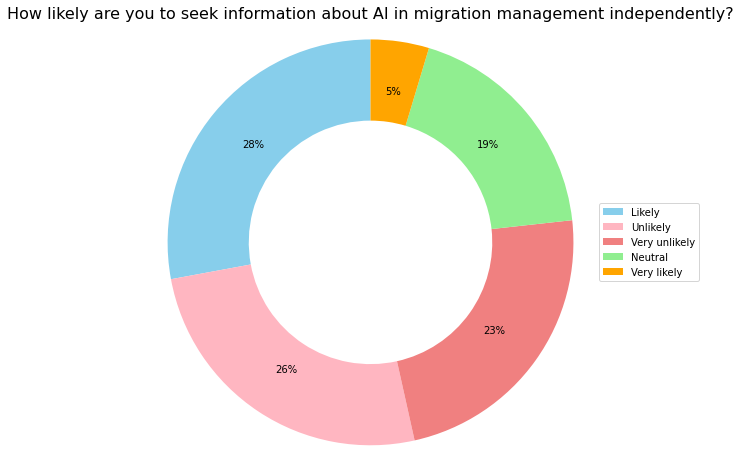

In [33]:
#Visulising the question 'How likely are you to seek information about AI in migration management independently?' using a pie chart

#Count the occurance of each ethnicity
information_counts = survey_df['seek information'].value_counts()

#Plot
plt.figure(figsize=(8, 8))
plt.pie(information_counts, labels=None,autopct='%1.0f%%', startangle=90, wedgeprops=dict(width=0.4), colors=custom_colours, pctdistance=0.75)
plt.legend(labels=information_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.title('How likely are you to seek information about AI in migration management independently?', fontsize=16)

#Display
plt.show()


# aggriagte ? chnage colour and use a colormap where darks are posistive and lights are negative 

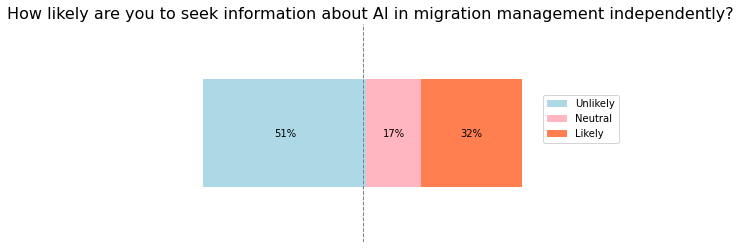

In [34]:
#Aggregating responces to the above question into overall 'likely, neutral and unlikely' for clearer s visulisation

#Categorise repsonces into sentiment catagories
pos_neg = {'Very unlikely': 'Unlikely', 
           'Unlikely': 'Unlikely',
           'Neutral': 'Neutral', 
           'Likely': 'Likely', 
           'Very likely': 'Likely'}

#Map and store in new column and set its type
survey_df['sentiment'] = uk_yes['seek information'].map(pos_neg) 
survey_df['sentiment'] = survey_df['sentiment'].astype(pd.CategoricalDtype(categories=['Unlikely', 'Neutral', 'Likely'], ordered=True))

#Calculate the percentage for each responce
sentiment_count = survey_df['sentiment'].value_counts(sort=False)
percentage = sentiment_count / sentiment_count.sum() * 100 

#Plot the stacked bar, add the 50% line
ax = percentage.to_frame().T.plot.barh(stacked=True, color= ['lightblue', 'lightpink','coral'])
ax.set_title('How likely are you to seek information about AI in migration management independently?', fontsize= 16) 
ax.axvline(50, color='grey', linestyle='dashed', linewidth=1)
ax.legend(bbox_to_anchor=(1.0, 0.7))

#Remove axis's and spines
sns.despine()
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks([])
plt.xticks([])

#Add percentages labels
plt.text(percentage['Unlikely'] / 2, 0, f'{percentage["Unlikely"]:.0f}%', ha='center', va='center', fontsize=10)
plt.text(percentage['Unlikely'] + percentage['Neutral'] / 2, 0, f'{percentage["Neutral"]:.0f}%', ha='center', va='center', fontsize=10)
plt.text(percentage['Unlikely'] + percentage['Neutral'] +percentage['Likely']/ 2, 0, f'{percentage["Likely"]:.0f}%', ha='center', va='center', fontsize=10)

#Display
plt.show()


# Visulaising the new added questions 

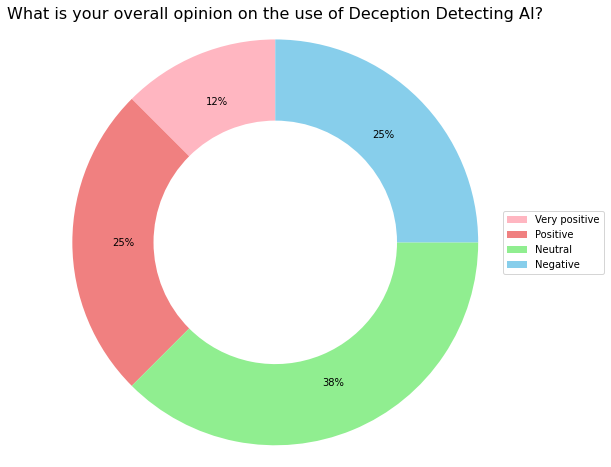

In [35]:
#Visualising the survey question: 'What is your overall opinion on the use of Deception Detecting AI to analyse asylum seekers' statements for potential deception?'

#Focus on new responces
added = ['scenario impact']
df_filtered = survey_df.dropna(subset=added)

#Count the occurance of each opinion
opinion_counts = df_filtered['scenario opinion'].value_counts()

#Define the desired order then reorder 
desired_order = ['Very positive', 'Positive', 'Neutral', 'Negative', 'Very negative']
opinion_counts = opinion_counts.reindex(desired_order).dropna()

#Plot
custom_colours = ['lightpink','lightcoral', 'lightgreen', 'skyblue',  'orange']
plt.figure(figsize=(8, 8))
plt.pie(opinion_counts, labels=None,autopct='%1.0f%%', startangle=90, wedgeprops=dict(width=0.4), colors=custom_colours, pctdistance=0.75)
plt.legend(labels=opinion_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.title('What is your overall opinion on the use of Deception Detecting AI?', fontsize=16)

#Display
plt.show()




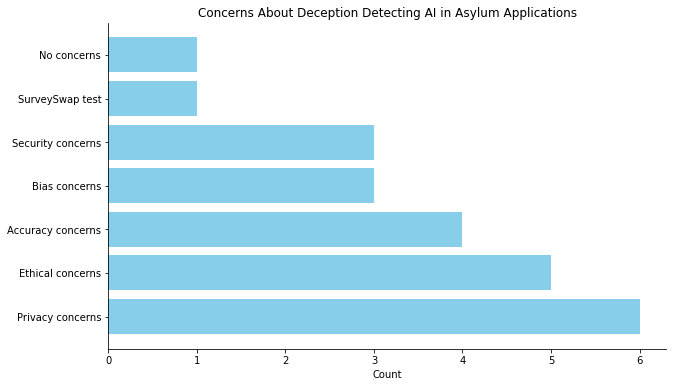

In [36]:
#Visualising the survey question: What concerns do you have, if any, about the implementation of Deception Detecting AI in the asylum application process?

#Split the 'scenario concerns' column 
concern_type_df = df['scenario concerns'].str.split(';').explode()
#Count the occurrences 
concern_count = concern_type_df.value_counts().reset_index()
#Label columns 
concern_count.columns = ['Concern', 'Count']

#Draw plot
plt.figure(figsize=(10, 6)) 
plt.barh(concern_count['Concern'], concern_count['Count'], color='skyblue')  # Create a bar chart
plt.xlabel('Count') 
plt.title("Concerns About Deception Detecting AI in Asylum Applications") 

#Remove the box around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Show
plt.show() 



# Visualising Respondents Who Are Migrants Compared to Others

In [39]:

#Define transparency levels order 
transparent_levels = ['Not transparent at all', 'Slightly transparent', 'Moderately transparent', 'Very transparent']

#Drop 'Prefer to to say from migrant option'
filtered_df = survey_df[survey_df['migrant'] != 'Prefer to to say']

#Convert to categorical type with this order
survey_df['transparent'] = survey_df['transparent'].astype(pd.CategoricalDtype(categories=transparent_levels, ordered=True))

#Create a crosstab with the percentage transparency levels within each migrant group 
table = pd.crosstab(survey_df['migrant'], filtered_df['transparent'], normalize='index')* 100

#Sort by highest value. 
table.sort_values(by='Very transparent', inplace=True) 
table

transparent,Not transparent at all,Slightly transparent,Moderately transparent,Very transparent
migrant,,,,
Yes,75.000000,8.333333,16.666667,0.000000
No,63.333333,20.000000,13.333333,3.333333


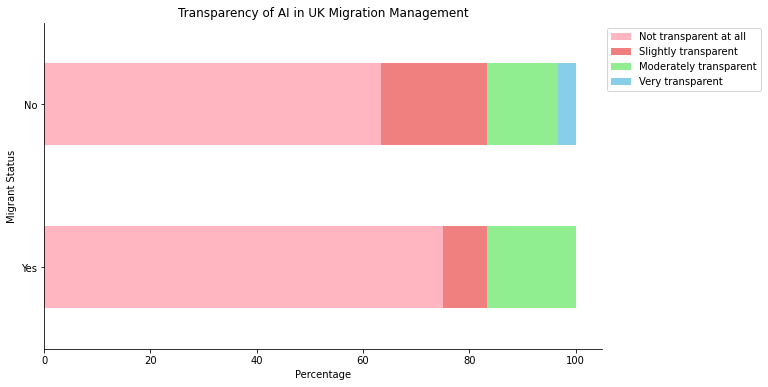

In [40]:
#Comparing migrant status and answers to the survey questions

#Plot stacked barchart for transparency 
custom_colours = ['lightpink','lightcoral', 'lightgreen', 'skyblue',  'orange']
ax = table.plot.barh(stacked=True, figsize=(10, 6), color= custom_colours)

#Draw legend outside the axes
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.0, 1.0))

#Set labels and title
ax.set_xlabel('Percentage')
ax.set_ylabel('Migrant Status')
ax.set_title('Transparency of AI in UK Migration Management')
sns.despine()

#Show
plt.show()

